# Airline Analysis

In this project, you'll imagine that you work for a travel agency and need to know the ins and outs of airline prices for your clients. You want to make sure that you can find the best deal for your client and help them to understand how airline prices change based on different factors.

You decide to look into your favorite airline. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In this project, you'll explore a dataset for the first time and get to know each of these features. Keep in mind that there's no one right way to address each of these questions. The goal is simply to explore and get to know the data using whatever methods come to mind.

You will be working in this file. Note that there is the file **Airline Analysis_Solution.ipynb** that contains the solution code for this project. We highly recommend that you complete the project on your own without checking the solution, but feel free to take a look if you get stuck or if you want to compare answers when you're done.

In order to get the plots to appear correctly in the notebook, you'll need to show and then clear each plot before creating the next one using the following code:

```py
plt.show() # Show the plot
plt.clf() # Clear the plot
```

Clearing the plot will not erase the plot from view, it will just create a new space for the following graphic.

## Univariate Analysis

1. What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

The maximum coach price is 593.63 
The minimum coach price is 44.41
The average coach price is 376.59
500 dollars is higher than 98% of all other coach prices in the data set


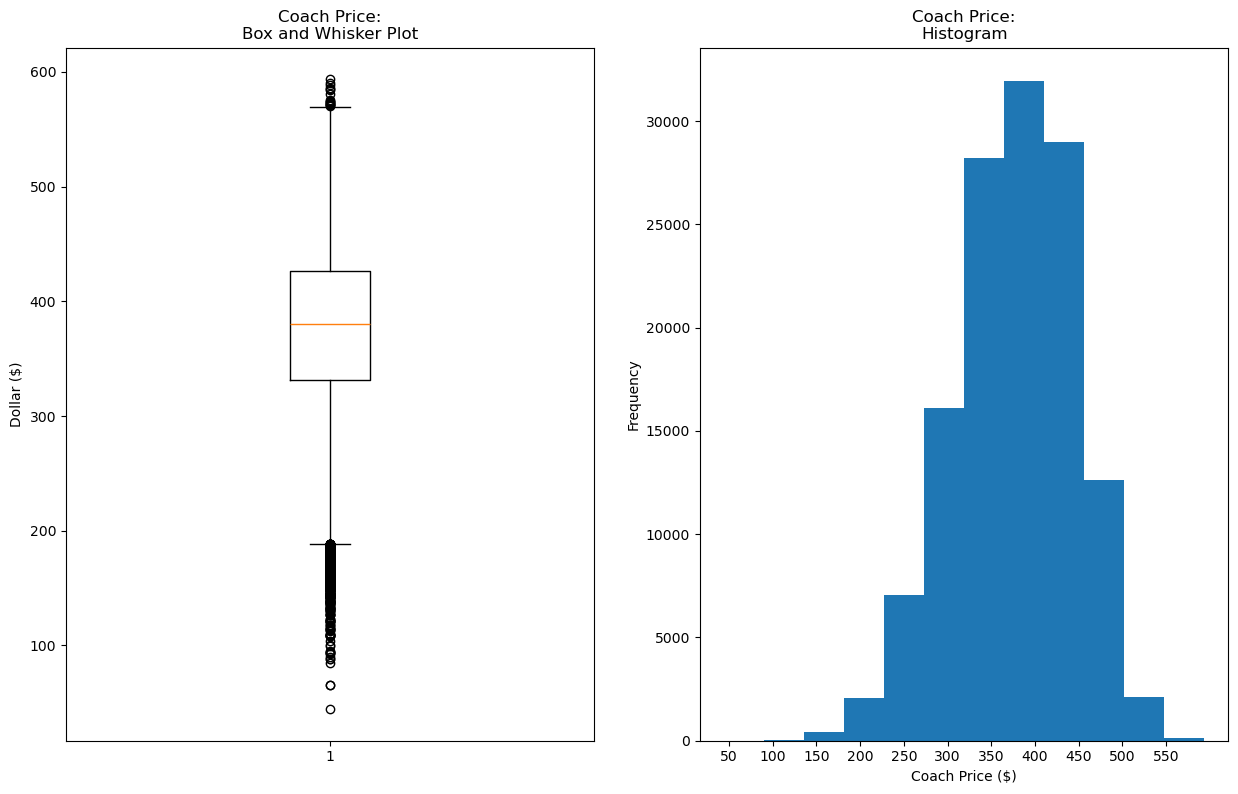

<Figure size 640x480 with 0 Axes>

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math
import scipy.stats as stats


## Read in Data
flight = pd.read_csv("flight.csv")
# print(flight.head())

## Task 1

coach = flight["coach_price"]
# print(len(coach))
coach_Max = round(coach.max(),2)
coach_Min = round(coach.min(),2)
coach_Avg = round(coach.mean(),2)
coach_500_percentile = round(stats.percentileofscore(coach, 500))
print(f"The maximum coach price is {coach_Max} \nThe minimum coach price is {coach_Min}\nThe average coach price is {coach_Avg}\n500 dollars is higher than 98% of all other coach prices in the data set")
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 9))
ax1.boxplot(coach)
ax1.set_title("Coach Price:\nBox and Whisker Plot")
ax1.set_ylabel("Dollar ($)")
plt.xticks(range(0,600,50))
ax2.hist(coach,bins=12)
ax2.set_title("Coach Price:\nHistogram")
plt.ylabel("Frequency")
plt.xlabel("Coach Price ($)")
plt.show()
plt.clf()

I decided to use a box and whisker plot and histogram to analyze the coach price. I am able to see where most of the data points are clustered and its spread. It has a slight skew to the left as seen in the histogram. As more values are clustered around 375 it can be said that 500 dollars is a bit high for coach price.

2. Now visualize the coach ticket prices for flights that are 8 hours long. What are the high, low, and average prices for 8-hour-long flights? Does a $500 dollar ticket seem more reasonable than before?

2634
The maximum coach price is 593.63 
The minimum coach price is 170.77
The average coach price is 431.83


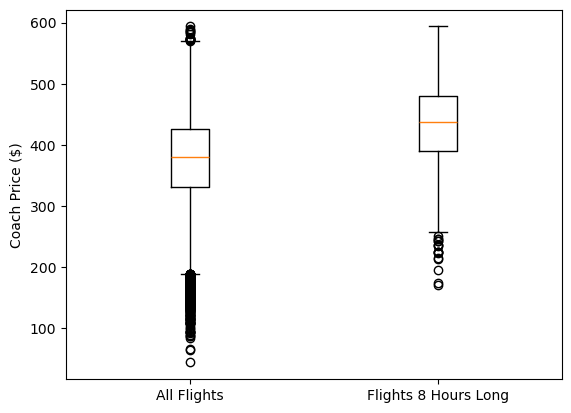

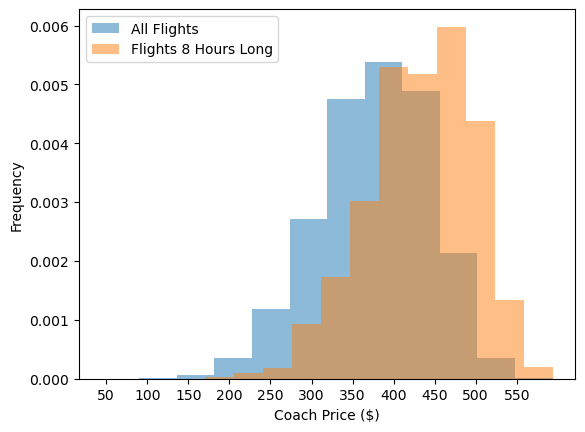

<Figure size 640x480 with 0 Axes>

In [88]:
## Task 2
coach_longer_than_8 = flight.loc[flight['hours'] == 8, 'coach_price']
print(len(coach_longer_than_8))
coach_longer_than_8_Max = round(coach_longer_than_8.max(),2)
coach_longer_than_8_Min = round(coach_longer_than_8.min(),2)
coach_longer_than_8_Avg = round(coach_longer_than_8.mean(),2)

print(f"The maximum coach price is {coach_longer_than_8_Max} \nThe minimum coach price is {coach_longer_than_8_Min}\nThe average coach price is {coach_longer_than_8_Avg}")

plt.boxplot([coach,coach_longer_than_8],labels = ["All Flights","Flights 8 Hours Long"])
plt.ylabel("Coach Price ($)")
plt.show()
plt.clf()
plt.xticks(range(0,600,50))
plt.hist(coach,bins=12,density=True,alpha=0.5,label='All Flights')
plt.hist(coach_longer_than_8,bins=12,density=True,alpha=0.5,label = 'Flights 8 Hours Long')
plt.legend()
plt.ylabel("Frequency")
plt.xlabel("Coach Price ($)")
plt.show()
plt.clf()



Does a $500 dollar ticket seem more reasonable than before? :

Yes a $500 dollar coach ticket price for an 8 hour flight is more reasonable now when compared to all coach prices. When analyzing these two data sets side by side, the coach price tickets for 8 hour flights have a higher average of 431.83.

3. How are flight delay times distributed? Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight. You want to better understand how often there are large delays so you can correctly set up connecting flights. What kinds of delays are typical?

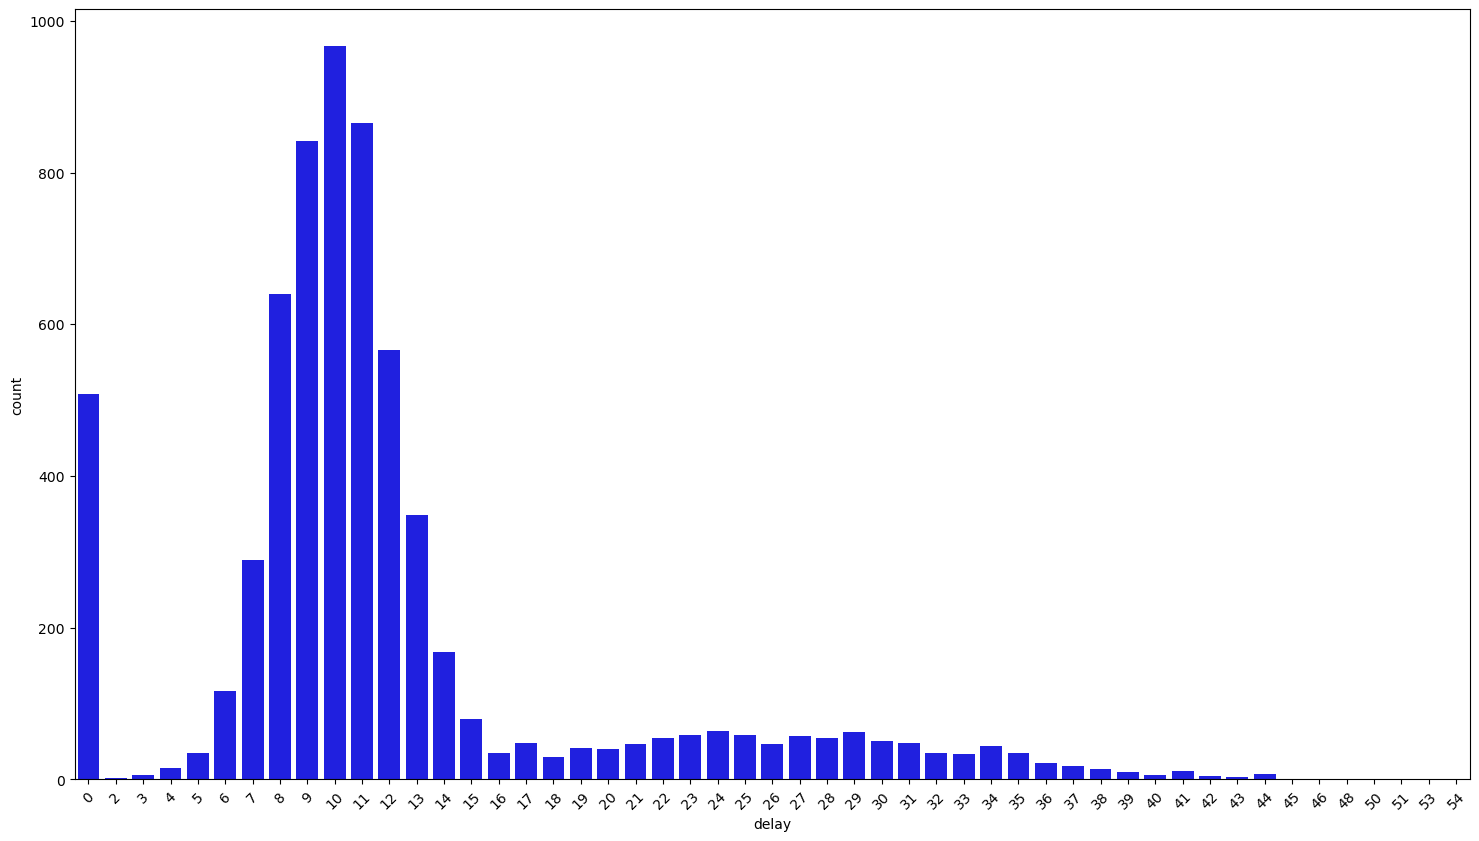

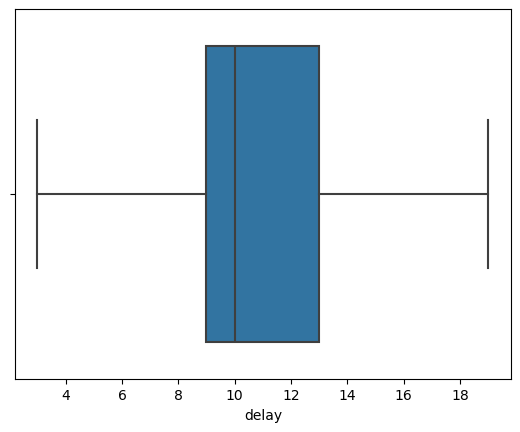

<Figure size 640x480 with 0 Axes>

In [122]:
## Task 3

perc = 0.05
flight_no_outliers = flight[(flight.delay <= 54)] # this gets rid of outliers where values skewed the data
flight_sample_of_no_outlier = flight_no_outliers.sample(n = int(flight_no_outliers.shape[0]*perc)) 
# ^^^ Take only 5% random sample of flight data without the outliers






plt.figure(figsize=(18,10))
sns.countplot(x='delay', data=flight_sample_of_no_outlier,color='blue')
plt.xticks(rotation=45)
plt.show()
plt.clf()



sns.boxplot(x='delay',data=flight_sample_of_no_outlier,showfliers=False)
plt.show()
plt.clf()





The delay data set was messy so I had to take some steps to clean it up. There were some values in the thousands which heavily skewed the dataset to the right. There were also many data points so I had to take a 5% random sample of this modified data set to get a better visual of the central mode of tendencies. The Box and whisker plot shows us the median delay is 10 minutes, and the histogram shows us the mode is also 10 minutes. Based off these observations it would be safe to assume most delays are centered around 10 minutes.

## Bivariate Analysis

4. Create a visualization that shows the relationship between coach and first-class prices. What is the relationship between these two prices? Do flights with higher coach prices always have higher first-class prices as well?

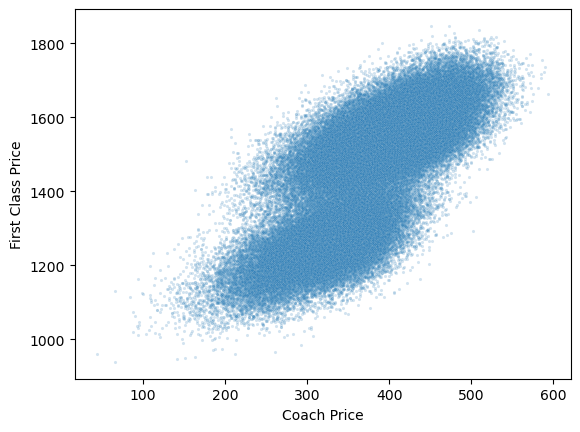

<function matplotlib.pyplot.clf() -> 'None'>

In [124]:
## Task 4
sns.scatterplot(x=flight.coach_price,y=flight.firstclass_price,s = 5, alpha = 0.2)
plt.xlabel('Coach Price')
plt.ylabel('First Class Price')
#sns.lmplot(x='coach_price', y='firstclass_price', data = flight, line_kws={'color': 'black'}, lowess=True)
plt.show()
plt.clf


I have created a scatterplot of the two variables Coach Price and First Class Price. There appears to be positive correlation between these two variables. In other words when coach prices increase the first class price increases. This is taken from the original data set with all its values.

5. What is the relationship between coach prices and inflight features &mdash; inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

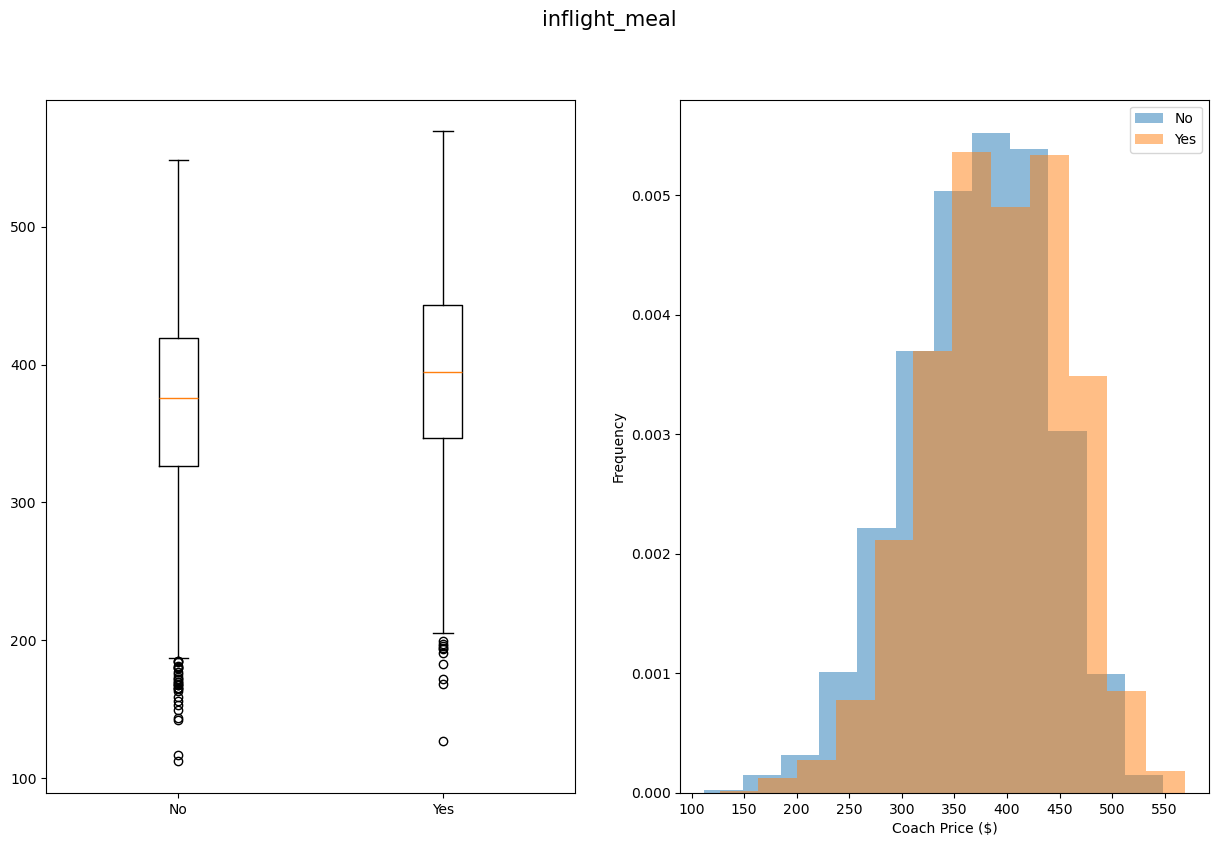

<Figure size 640x480 with 0 Axes>

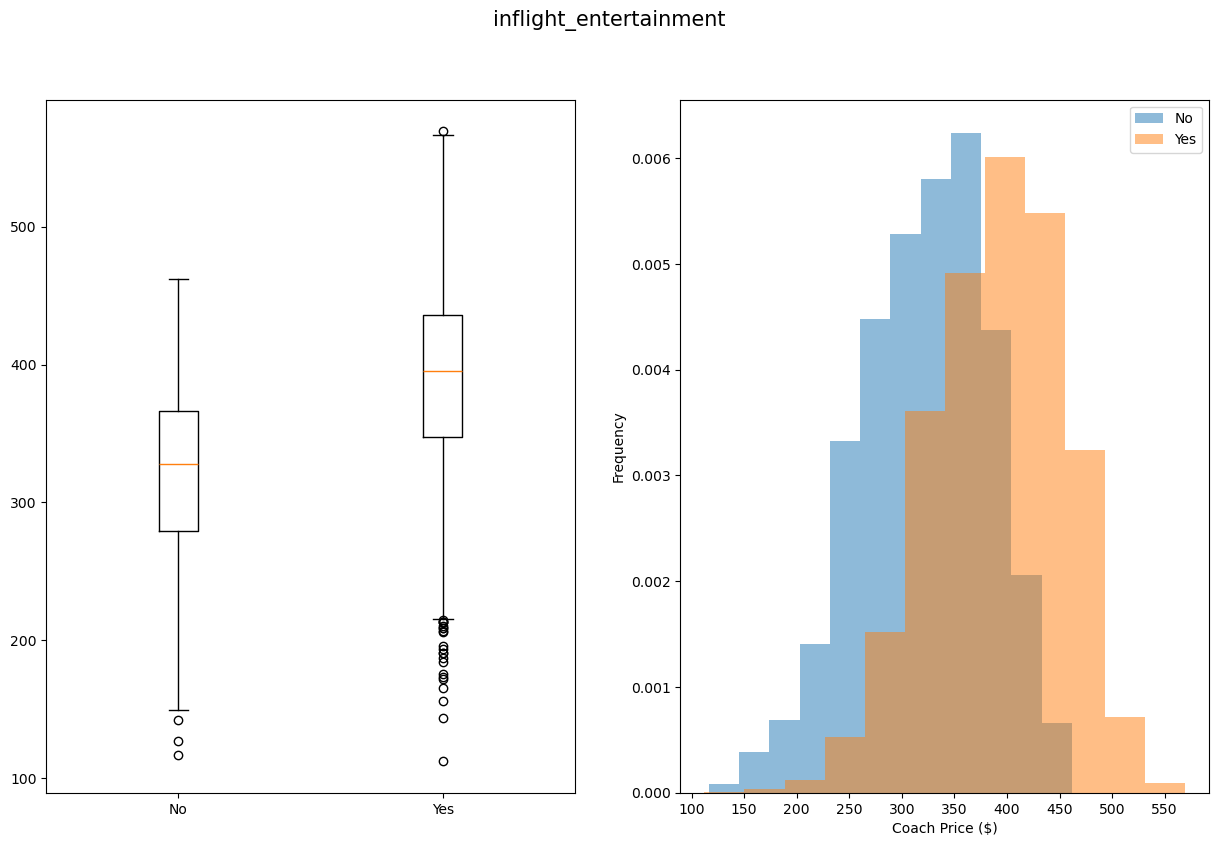

<Figure size 640x480 with 0 Axes>

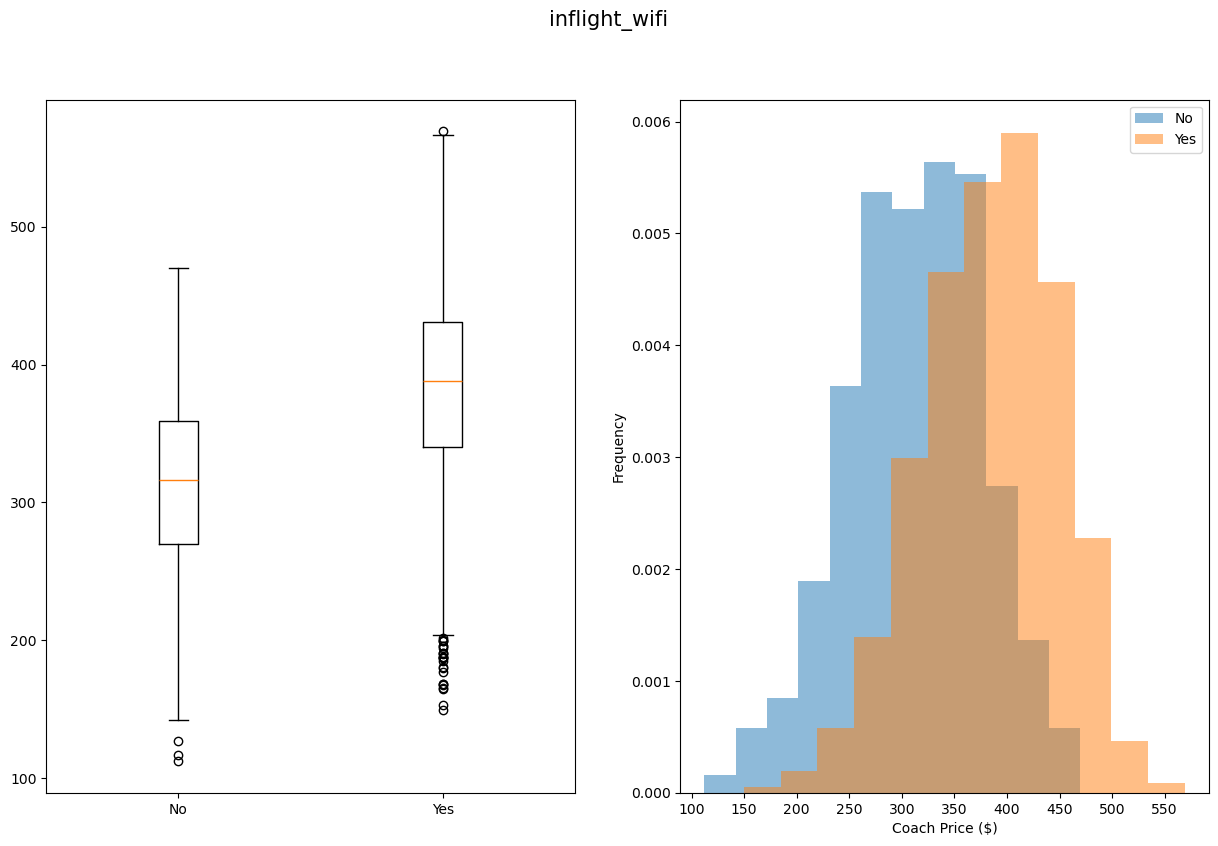

<Figure size 640x480 with 0 Axes>

In [32]:
## Task 5
#Make a function that take feature (inflight meal, inflight wifi etc...) 
#Output yes/no side by side histogram and box and whisker plot
flight_s = flight.sample(n = int(flight.shape[0]*perc))

def create_comparison(x):
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 9))
    
    flight_no = flight_s.loc[flight_s[x] == 'No', 'coach_price']
    flight_yes = flight_s.loc[flight_s[x] == 'Yes', 'coach_price']
    
    # flight_no_Max = round(flight_no.max(),2)
    # flight_no_Min = round(flight_no.min(),2)
    # flight_no_Avg = round(flight_no.mean(),2)
    
    #print(f"The maximum coach price is {coach_longer_than_8_Max} \nThe minimum coach price is {coach_longer_than_8_Min}\nThe average coach price is {coach_longer_than_8_Avg}")
    # plt.title(x)
    fig.suptitle(x, fontsize=15)
    ax1.boxplot([flight_no,flight_yes],labels = ["No","Yes"])
    plt.ylabel("Coach Price ($)")
    # plt.show()
    # plt.clf()

    # plt.title(x)
    plt.xticks(range(0,600,50))
    ax2.hist(flight_no,bins=12,density=True,alpha=0.5,label='No')
    ax2.hist(flight_yes,bins=12,density=True,alpha=0.5,label = 'Yes')
    plt.legend()
    plt.ylabel("Frequency")
    plt.xlabel("Coach Price ($)")

    plt.show()
    plt.clf()

create_comparison("inflight_meal")
create_comparison("inflight_entertainment")
create_comparison("inflight_wifi")


I created a function that takes an inflight feature and outputs a side by side comparison of coach prices of tickets that include and don't include these inflight features. These comparisons are in the form of box and whisker plot and histograms.  Based of my analysis of these comparisons it seems inflight wi-fi and enterntainment included on tickets is corelated with higher coach ticket prices. As for inflight meals, its inclusion on ticket prices did not lead to higher coach price tickets.

6. How does the number of passengers change in relation to the length of flights?

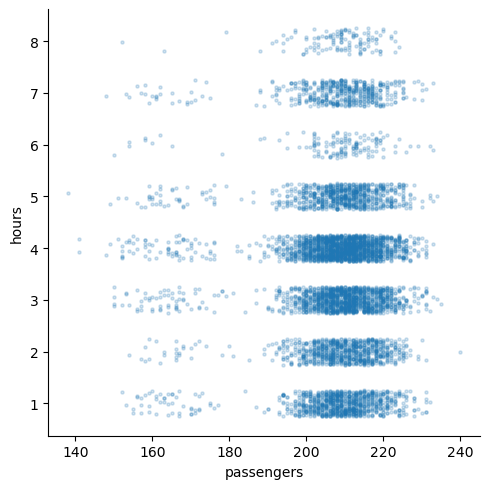

<Figure size 640x480 with 0 Axes>

In [129]:
## Task 6


#sns.lmplot(x='hours', y='passengers', data = flight_s, line_kws={'color': 'black'}, lowess=True)
sns.lmplot(x='passengers', y='hours',data = flight_s, y_jitter = .25, fit_reg = False,scatter_kws={"s": 5, "alpha":0.2})
plt.show()
plt.clf()


I used a random sample of the original data set which is only 5% of the total data points. Using this I created a scatterplot using seabornes lmplot and jittered points to get a better sense of where the points are concentrated. Based off this visualization I can say that as flight times exceed 5 hours the amount of passengers declines. Most of the flights have around 210 passengers with most flight times taking around 4 hours. 

## Multivariate Analysis

7. Visualize the relationship between coach and first-class prices on weekends compared to weekdays.

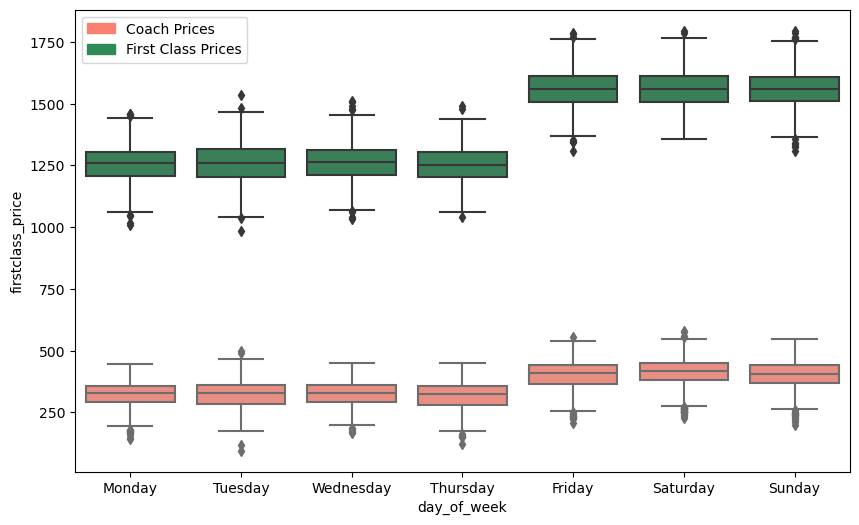

<Figure size 640x480 with 0 Axes>

In [22]:
## Task 7
import matplotlib.patches as mpatches
week_order = ['Monday','Tuesday', 'Wednesday' ,'Thursday', 'Friday', 'Saturday','Sunday',]
plt.figure(figsize=(10,6))
sns.boxplot(y = "coach_price", x = "day_of_week", data = flight_s,order=week_order,color="salmon",)
sns.boxplot(y = "firstclass_price", x = "day_of_week", data = flight_s,order=week_order,color="seagreen")
salmon_patch = mpatches.Patch(color='salmon', label='Coach Prices')
seagreen_patch = mpatches.Patch(color='seagreen', label='First Class Prices')
plt.legend(handles=[salmon_patch,seagreen_patch],loc='best')
plt.show()
plt.clf()


8. How do coach prices differ for redeyes and non-redeyes on each day of the week?

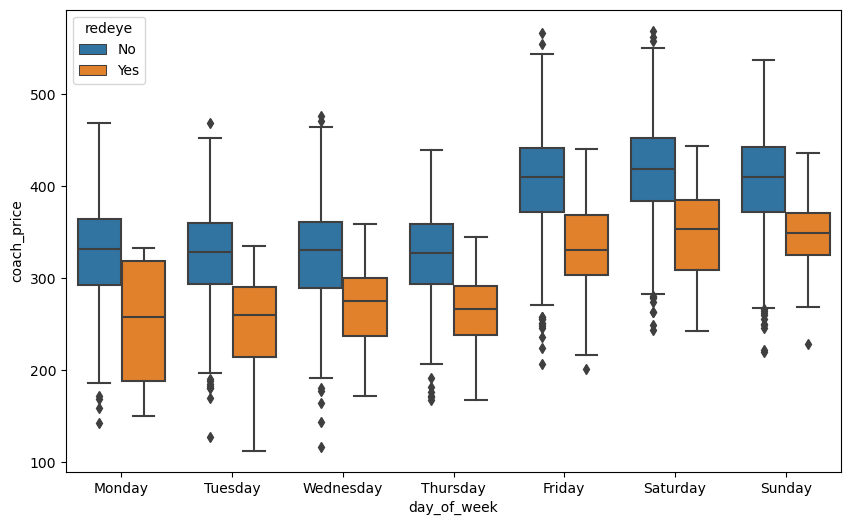

<Figure size 640x480 with 0 Axes>

In [132]:
## Task 8
plt.figure(figsize=(10,6))
sns.boxplot(y = "coach_price", x = "day_of_week",hue="redeye", data = flight_s,order=week_order)
plt.show()
plt.clf()


